In [1]:
import numpy as np 
import pandas as pd 

df=pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 1. Preprocessing

In [5]:

le = preprocessing.LabelEncoder()
df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'])
df['Season'] = le.fit_transform(df['Season'])
df['Location'] = le.fit_transform(df['Location'])
df['Weather Type'] = le.fit_transform(df['Weather Type'])

In [7]:
df_ = df.drop(columns='Weather Type')
features = df_.columns
w_type = df['Weather Type']

#### Correlation Matrix

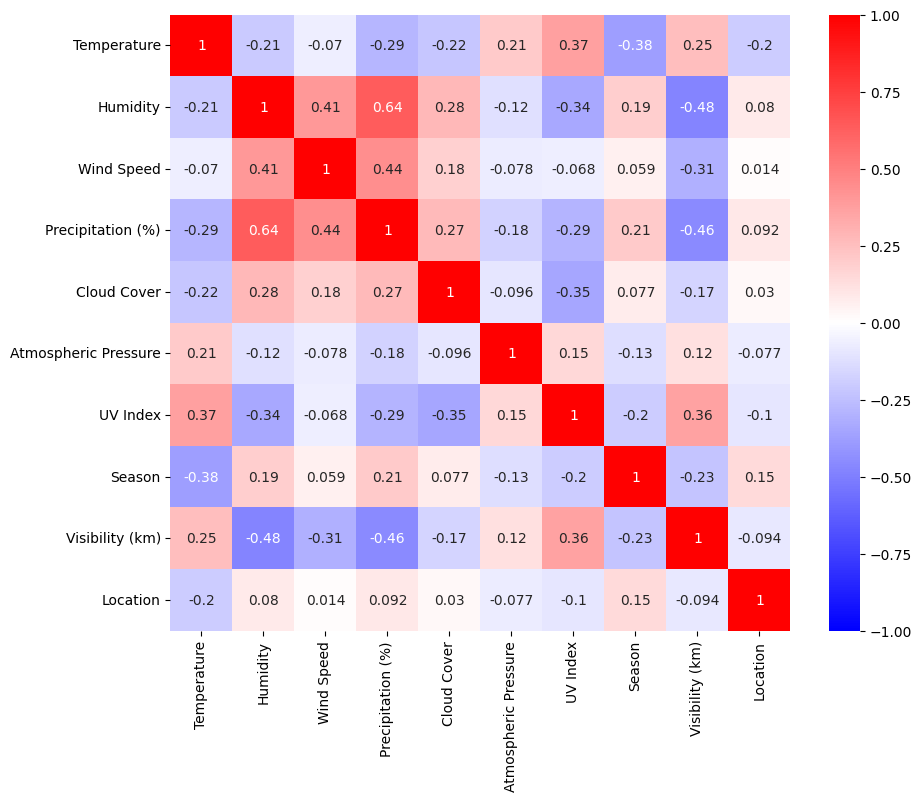

In [7]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='bwr')
plt.savefig('correlation_heatmap.png', dpi=1200)

#### Feature Distribution

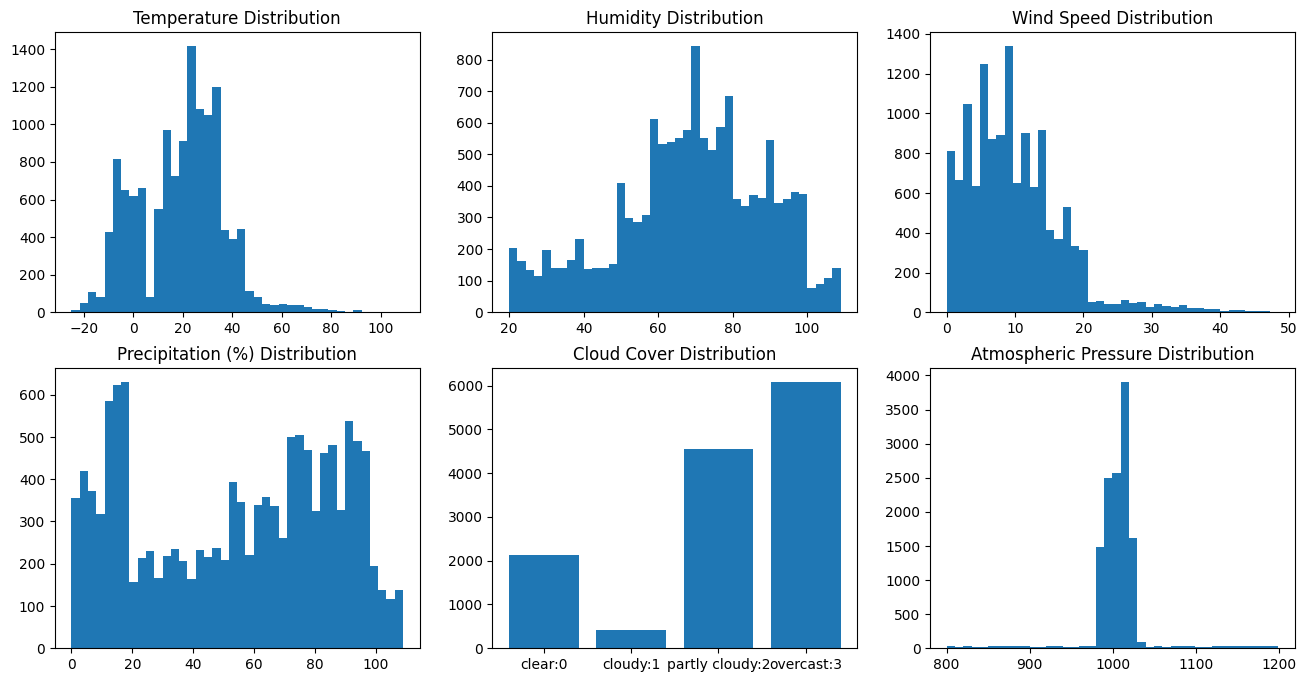

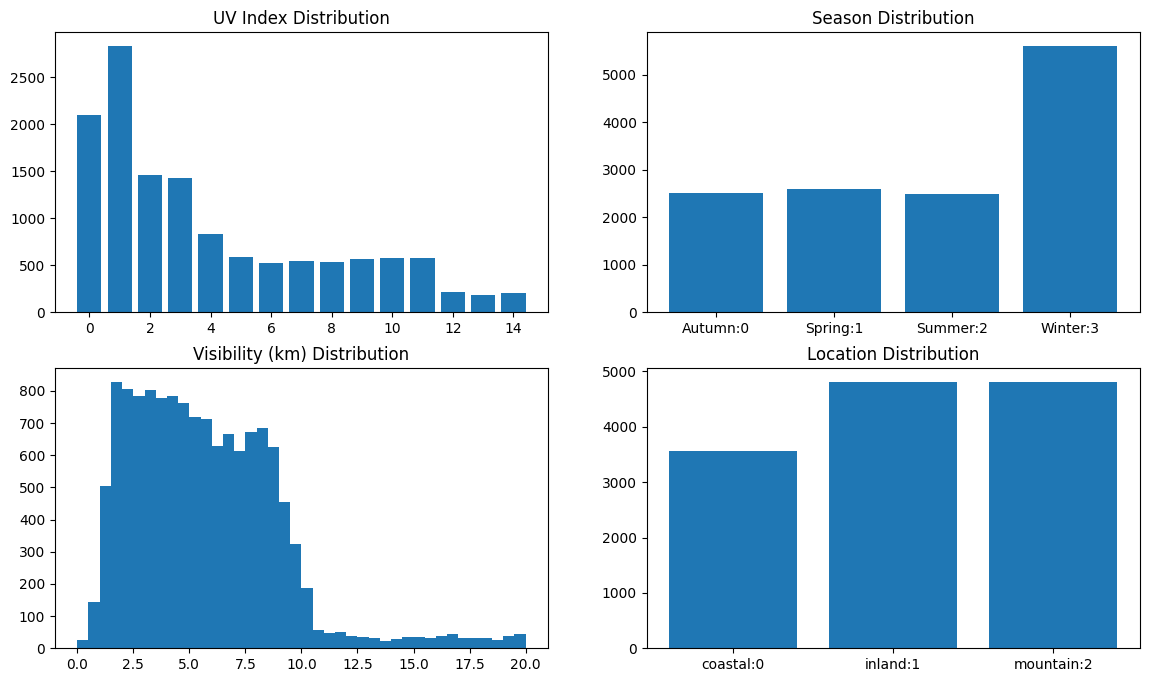

In [12]:
fig1, axes1 = plt.subplots(2,3,figsize=(16,8))

ax1 = axes1[0][0]
ax2 = axes1[0][1]
ax3 = axes1[0][2]
ax4 = axes1[1][0]
ax5 = axes1[1][1]
ax6 = axes1[1][2]

data1 = np.array(df['Temperature'])
ax1.hist(data1, bins=40)
ax1.set_title('Temperature Distribution')

data2 = np.array(df['Humidity'])
ax2.hist(data2, bins=40)
ax2.set_title('Humidity Distribution')

data3 = np.array(df['Wind Speed'])
ax3.hist(data3, bins=40)
ax3.set_title('Wind Speed Distribution')

data4 = np.array(df['Precipitation (%)'])
ax4.hist(data4, bins=40)
ax4.set_title('Precipitation (%) Distribution')

data5 = np.array(df['Cloud Cover'])
ax5.bar([0,1,2,3], [2139,411,4560,6090])
ax5.set_title('Cloud Cover Distribution')
ax5.set_xticks([0,1,2,3], labels=['clear:0','cloudy:1','partly cloudy:2','overcast:3'])

data6 = np.array(df['Atmospheric Pressure'])
ax6.hist(data6, bins=40)
ax6.set_title('Atmospheric Pressure Distribution')
fig1.savefig('feature_distribution_1.png', dpi=1200, bbox_inches='tight')


fig2, axes2 = plt.subplots(2,2,figsize=(14,8))

ax1 = axes2[0][0]
ax2 = axes2[0][1]
ax3 = axes2[1][0]
ax4 = axes2[1][1]

data1 = df['UV Index'].value_counts()
y = data1.values
x = data1.index
ax1.bar(x,y)
ax1.set_title('UV Index Distribution')

ax2.bar([3,1,0,2], [5610,2598,2500,2492])
ax2.set_title('Season Distribution')
ax2.set_xticks([0,1,2,3], labels=['Autumn:0','Spring:1','Summer:2','Winter:3'])

data3 = np.array(df['Visibility (km)'])
ax3.hist(data3, bins=40)
ax3.set_title('Visibility (km) Distribution')

ax4.bar([1,2,0], [4816, 4813, 3571])
ax4.set_title('Location Distribution')
ax4.set_xticks([0,1,2], labels=['coastal:0','inland:1','mountain:2'])
fig2.savefig('feature_distribution_2.png', dpi=1200, bbox_inches='tight')

plt.show()

### PCA

In [13]:
from sklearn.decomposition import PCA

In [15]:
df_ = df.drop(columns='Weather Type')
X = np.array(df_)
y = np.array(df['Weather Type'])

scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components='mle')
pca.fit(X_std)
X_pca = pca.transform(X)

pd.DataFrame(X_pca).head

<bound method NDFrame.head of                 0           1          2           3           4           5  \
0     -115.508445  285.337717   2.938314  937.283511 -117.857924  117.170779   
1     -123.458957  301.622157   1.203125  937.488765 -112.568602  112.982924   
2     -158.184841  275.474342   9.576539  945.982045 -115.739798  113.030059   
3     -125.994680  301.723015   0.009161  951.364908 -118.573081  108.494376   
4     -119.811238  286.113062   1.465607  918.663299 -112.702375  113.189243   
...           ...         ...        ...         ...         ...         ...   
13195 -114.896315  281.736575   2.501647  930.789630 -116.446996  116.113484   
13196 -148.238609  274.736188  13.923858  992.995721 -128.038649  122.078363   
13197 -147.400322  280.276542  11.149373  940.274483 -114.837314  111.878100   
13198  -99.680778  277.807583   0.992682  912.947874 -116.669786  114.448487   
13199 -128.062949  266.368531   6.341282  938.877803 -118.837433  125.172823   

         

### Split Dataset

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=3407)

scaler_train = preprocessing.StandardScaler()
scaler_test = preprocessing.StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

## 2. Train Models

In this work, we implemented following models and methods:

- Baseline models, including `Logistic Regression`, `Random Forest`, `SVM` and `Gradient Boosting`;

- `Stacking` method to ensemble different models above;

- Neural Networks, including , `GRU` and `LSTM`.

In [21]:
import random

In [23]:
# random seed
random_seed=3407
random.seed(random_seed)
np.random.seed(random_seed)

### Baselines 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [51]:
# baseline models
def list_models():
    models = {
        'SVM_rbf': SVC(C=10, gamma=0.1, random_state=3407),  
        'SVM_poly': SVC(C=10, gamma=0.1, kernel='poly'), 
        'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', C=0.1, tol=1e-6, random_state=3407),
        'Random Forest': RandomForestClassifier(n_estimators=300, random_state=3407),  # Bagging
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, random_state=3407)  
    }
    return models

def train_and_evaluate_baselines(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"\nClassification Report for {name}:\n")
        print(classification_report(y_test, y_pred, digits=4))
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(f"Weighted F1 Score for {name}: {f1:.4f}\n")

In [55]:
models = list_models()
train_and_evaluate_baselines(models, X_train, X_test, y_train, y_test)


Classification Report for SVM_rbf:

              precision    recall  f1-score   support

           0     0.8813    0.8977    0.8894       645
           1     0.8979    0.9048    0.9013       651
           2     0.9424    0.9220    0.9321       692
           3     0.9169    0.9141    0.9155       652

    accuracy                         0.9098      2640
   macro avg     0.9096    0.9096    0.9096      2640
weighted avg     0.9102    0.9098    0.9100      2640

Accuracy for SVM_rbf: 0.9098
Weighted F1 Score for SVM_rbf: 0.9100


Classification Report for SVM_poly:

              precision    recall  f1-score   support

           0     0.8356    0.8434    0.8395       645
           1     0.8338    0.9017    0.8664       651
           2     0.9478    0.9191    0.9332       692
           3     0.9169    0.8635    0.8894       652

    accuracy                         0.8826      2640
   macro avg     0.8836    0.8819    0.8821      2640
weighted avg     0.8847    0.8826    0.883

### LSTM and GRU

In [25]:
timesteps = 1

def create_sequences(X, y, timesteps=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps + 1):
        X_seq.append(X[i:i+timesteps])
        y_seq.append(y[i+timesteps-1])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_pca, y, timesteps)

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_seq, y_seq, test_size=0.2, random_state=random_seed, shuffle=True)

scaler_train = preprocessing.StandardScaler()
scaler_test = preprocessing.StandardScaler()

X_train_flat = X_train_rnn.reshape(-1, X_train_rnn.shape[-1])
X_test_flat = X_test_rnn.reshape(-1, X_test_rnn.shape[-1])

X_train_std = scaler_train.fit_transform(X_train_flat).reshape(X_train_rnn.shape)
X_test_std = scaler_test.fit_transform(X_test_flat).reshape(X_test_rnn.shape)

X_train_reshaped = X_train_std
X_test_reshaped = X_test_std
print(X_train_reshaped.shape, X_test_reshaped.shape)

(10560, 1, 9) (2640, 1, 9)


In [27]:
num_classes = len(np.unique(y))

def lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(timesteps, X_train.shape[1])))
    model.add(Bidirectional(LSTM(units=units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

def gru_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(timesteps, X_train.shape[1])))
    model.add(GRU(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

In [29]:

lstm_param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
}

gru_param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
}

In [31]:
n_iter_search = 20
# sample hyperparameters
def sample_parameters(param_grid, n_iter):
    sampled_params = []
    keys = list(param_grid.keys())
    for _ in range(n_iter):
        params = {key: random.choice(param_grid[key]) for key in keys}
        sampled_params.append(params)
    return sampled_params

lstm_param_samples = sample_parameters(lstm_param_grid, n_iter_search)
gru_param_samples = sample_parameters(gru_param_grid, n_iter_search)

Train and fine-tune LSTM Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
lstm_results = []
best_lstm_f1 = 0
best_lstm_params = None
best_lstm_model = None
best_lstm_history = None

print("\n Starting LSTM random search...")

for idx, params in enumerate(lstm_param_samples):
    print(f"\nLSTM parameter combination {idx + 1}/{n_iter_search}: {params}")
    lstm_ = lstm_model(
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        learning_rate=params['learning_rate']
    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    
    history_lstm = lstm_.fit(
        X_train_reshaped, y_train_rnn,
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0,
    )
    
    val_loss, val_accuracy = lstm_.evaluate(X_train_reshaped, y_train_rnn, verbose=0)
    print(f"Accuracy on Train Set: {val_accuracy:.4f}")
    
    y_pred_lstm = lstm_.predict(X_test_reshaped)
    y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)
    f1 = f1_score(y_test_rnn, y_pred_classes_lstm, average='micro')
    print(f"F1 Score on Test Set: {f1:.4f}")
    
    lstm_results.append({
        'params': params,
        'f1_score': f1,
        'model': lstm_,
        'history': history_lstm.history
    })
    # save the best model
    if f1 > best_lstm_f1:
        best_lstm_f1 = f1
        best_lstm_params = params
        best_lstm_model = lstm_
        best_lstm_history = history_lstm.history

print("\nLSTM random search completed.")
print(f"Best LSTM params: {best_lstm_params}")
print(f"Best F1 Score on Test Set: {best_lstm_f1:.4f}")



 Starting LSTM random search...

LSTM parameter combination 1/20: {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 50}
Accuracy on Train Set: 0.9146
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
F1 Score on Test Set: 0.9011

LSTM parameter combination 2/20: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 100}
Accuracy on Train Set: 0.9052
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
F1 Score on Test Set: 0.8962

LSTM parameter combination 3/20: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 50}
Accuracy on Train Set: 0.8936
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
F1 Score on Test Set: 0.8875

LSTM parameter combination 4/20: {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 150}
Accuracy on Train Set: 0.9019
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
F1 Score on Test Set: 0.8962

LSTM parameter combination 5/20: {'units': 50, 'dropout_rate': 

Train and fine-tune GRU Model

In [38]:
gru_results = []
best_gru_f1 = 0
best_gru_params = None
best_gru_model = None
best_gru_history = None

print("\n Starting GRU random search...")

for idx, params in enumerate(gru_param_samples):
    print(f"\nGRU parameter combination {idx + 1}/{n_iter_search}: {params}")
    gru_ = gru_model(
        units=params['units'],
        dropout_rate=params['dropout_rate'],
        learning_rate=params['learning_rate']
    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    
    history_gru = gru_.fit(
        X_train_reshaped, y_train_rnn,
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )
    
    val_loss, val_accuracy = gru_.evaluate(X_train_reshaped, y_train_rnn, verbose=0)
    print(f"Accuracy on Train Set: {val_accuracy:.4f}")
    
    y_pred_gru = gru_.predict(X_test_std)
    y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)
    f1 = f1_score(y_test, y_pred_classes_gru, average='micro')
    print(f"F1 Score on Test Set: {f1:.4f}")

    gru_results.append({
        'params': params,
        'f1_score': f1,
        'model': gru_,
        'history': history_gru.history
    })
    # save the best model
    if f1 > best_gru_f1:
        best_gru_f1 = f1
        best_gru_params = params
        best_gru_model = gru_
        best_gru_history = history_gru.history

print("\nGRU random search completed.")
print(f"Best GRU params: {best_gru_params}")
print(f"Best F1 Score on Test Set: {best_gru_f1:.4f}")


 Starting GRU random search...

GRU parameter combination 1/20: {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 150}
Accuracy on Train Set: 0.9191
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 Score on Test Set: 0.9080

GRU parameter combination 2/20: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 50}
Accuracy on Train Set: 0.9113
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 Score on Test Set: 0.9008

GRU parameter combination 3/20: {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 150}
Accuracy on Train Set: 0.8957
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 Score on Test Set: 0.8917

GRU parameter combination 4/20: {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 100}
Accuracy on Train Set: 0.8945
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
F1 Score on Test Set: 0.8909

GRU parameter combination 5/20: {'units': 50, 'dropout_rate': 0.2, 'lear

Confusion Matrix for LSTM and GRU

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


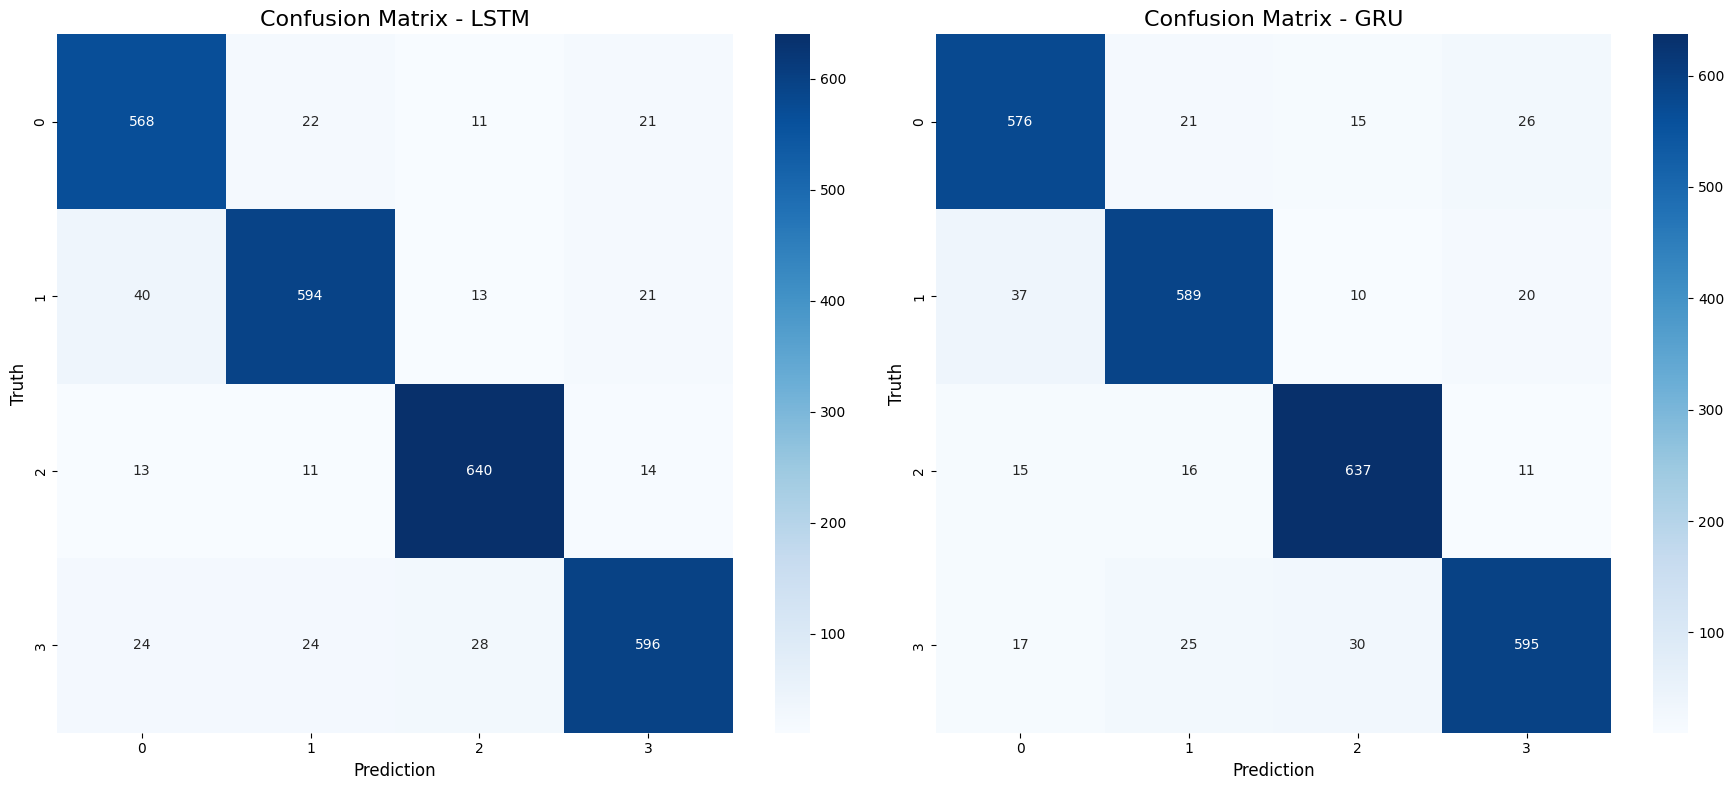

In [41]:
y_pred_lstm = best_lstm_model.predict(X_test_reshaped)
y_pred_gru = best_gru_model.predict(X_test_reshaped)
# confusion matrix
conf_matrix_lstm = confusion_matrix(np.argmax(y_pred_lstm, axis=1), y_test)
conf_matrix_gru = confusion_matrix(np.argmax(y_pred_gru, axis=1), y_test)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - LSTM", fontsize=16)
axes[0].set_xlabel("Prediction", fontsize=12)
axes[0].set_ylabel("Truth", fontsize=12)

sns.heatmap(conf_matrix_gru, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - GRU", fontsize=16)
axes[1].set_xlabel("Prediction", fontsize=12)
axes[1].set_ylabel("Truth", fontsize=12)

plt.tight_layout()
plt.show()

In [46]:
y_pred_lstm = best_lstm_model.predict(X_test_reshaped)
y_pred_gru = best_gru_model.predict(X_test_reshaped)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [44]:
accu = accuracy_score(y_test, np.argmax(y_pred_gru, axis=1))
print(accu)

0.9079545454545455
